In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:

df = pd.read_csv("C:/Users/irene/Codsoft/DataScience/task4/car_purchasing.csv", encoding="latin1")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

C:\Users\irene\AppData\Local\Temp\ipykernel_10064\789228250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


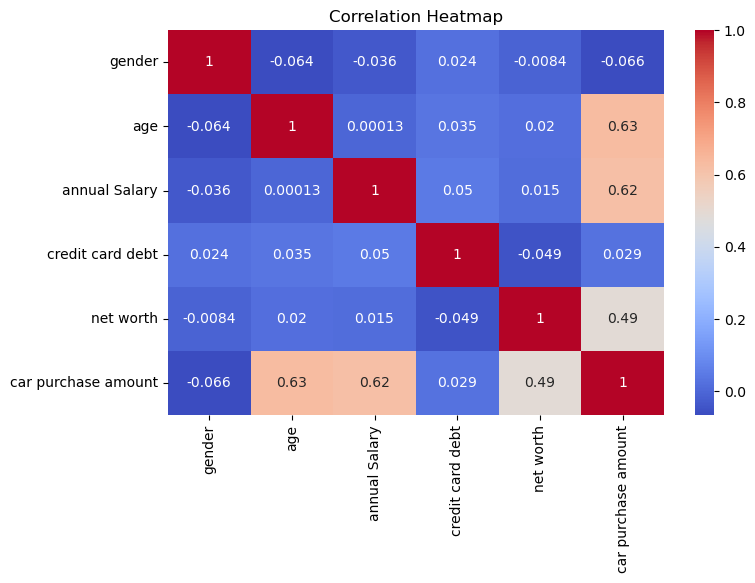

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

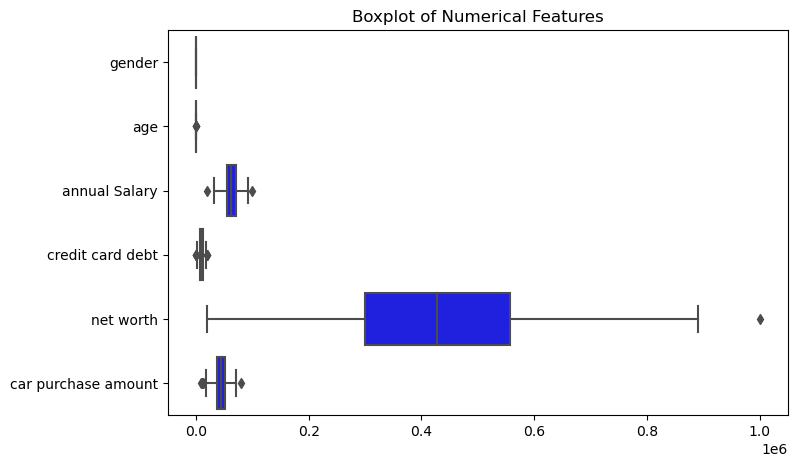

In [6]:
# Boxplot to visualize the distribution of numerical features
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, orient="h",color='blue')
plt.title("Boxplot of Numerical Features")
plt.show()

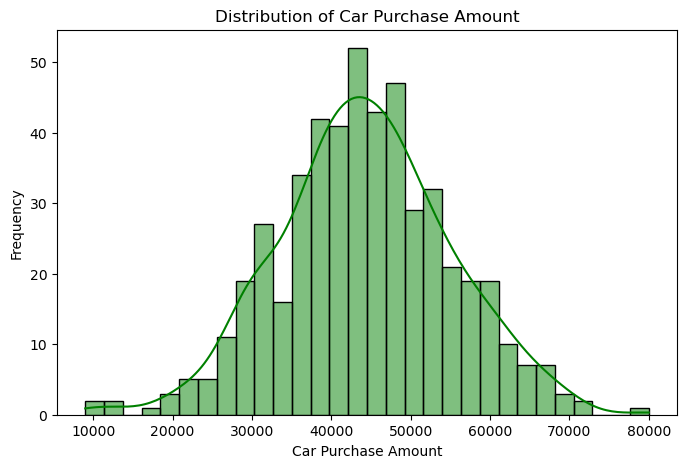

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df["car purchase amount"], bins=30, kde=True, color='green')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

In [8]:
df = df.drop(columns=['customer name','customer e-mail','country','gender','age'])

In [9]:
df.head()

,annual Salary,credit card debt,net worth,car purchase amount
0,62812.09301,11609.380910,238961.2505,35321.45877
1,66646.89292,9572.957136,530973.9078,45115.52566
2,53798.55112,11160.355060,638467.1773,42925.70921
3,79370.03798,14426.164850,548599.0524,67422.36313
4,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
x = df.iloc[:,:3]

In [11]:
x.head()

,annual Salary,credit card debt,net worth
0,62812.09301,11609.380910,238961.2505
1,66646.89292,9572.957136,530973.9078
2,53798.55112,11160.355060,638467.1773
3,79370.03798,14426.164850,548599.0524
4,59729.15130,5358.712177,560304.0671


In [12]:
y = df['car purchase amount']

In [13]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer
    keras.layers.Dense(units=64, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(units=32, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(units=1)  # Output layer (1 neuron for regression)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test data
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(x_test)

# You can use y_pred for making predictions on new data.

# Save the model if desired
model.save("car_sales_model.h5")









Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 2048655360.0000
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 2048604416.0000
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 2048539392.0000
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 2048453376.0000
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 2048332928.0000
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 2048175360.0000
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 2047960832.0000
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 2047684224.0000
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 2047328256.0000
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 2046882304.0000
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 2046333696.0000
Epoch 12/100
13/13 

c:\Users\irene\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#to ake predictions for random samples
# Make predictions on the random samples

random_sample = np.array([[41, 62812, 562341, 238961, 0, 1]])
random_sample = random_sample[:, :3]  # Keep only the first 3 columns

predicted_purchase_amounts = model.predict(random_sample)

# Display the predicted purchase amounts
for i, prediction in enumerate(predicted_purchase_amounts):
    print(f"Sample {i + 1} - Predicted Purchase Amount: {prediction[0]}")

1/1 [==============================] - 0s 134ms/step
Sample 1 - Predicted Purchase Amount: 35056.28125
